Text(0, 0.5, 'Feature 1')

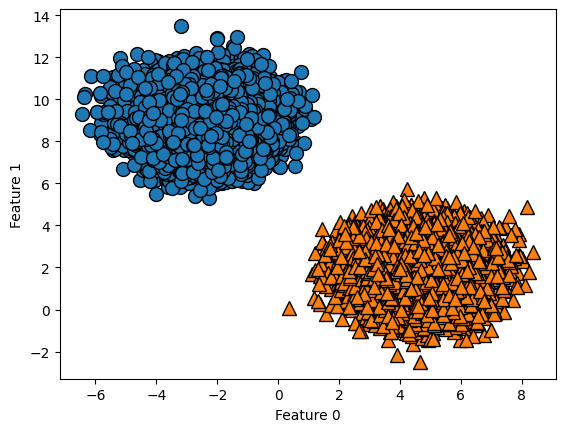

In [128]:
import numpy as np
import mglearn
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

X, y = make_blobs(n_samples=30000, n_features=2, centers=2, random_state=42) # type: ignore

# 绘制散点图,只用到前两个特征及标签
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

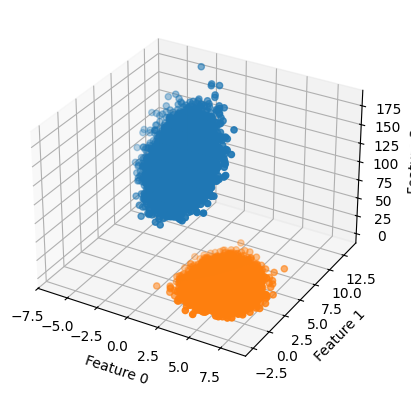

In [129]:
# 增加第三个特征
X_new = np.hstack([X, X[:, 1:]**2])

# 用 3 个特征在三维空间绘制散点图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot

# Scatter plot with different colors for classes
for class_value in np.unique(y):
    mask = y == class_value
    ax.scatter(
        X_new[mask, 0],  # X-coordinates for this class
        X_new[mask, 1],  # Y-coordinates for this class
        X_new[mask, 2],  # Z-coordinates for this class
        label=f'Class {class_value}'  # Add a legend entry for the class
    )

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 2")
plt.show()

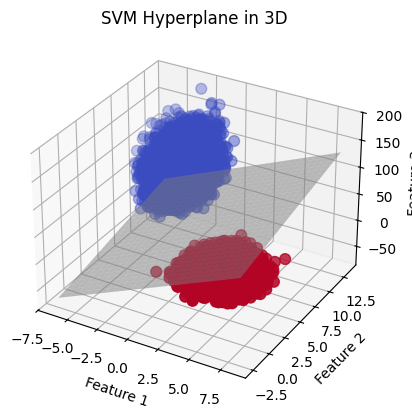

In [130]:
from sklearn.svm import LinearSVC

svm = LinearSVC().fit(X_new, y)

w = svm.coef_
b = svm.intercept_

X = X_new

w = svm.coef_[0]  # Weights for the 3 features (w1, w2, w3)
b = svm.intercept_[0]  # Bias term

# Create a meshgrid for plotting the decision boundary
x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 30)
y_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)

# Calculate the Z coordinates of the hyperplane using the equation:
# w1*x1 + w2*x2 + w3*x3 + b = 0 => x3 = -(w1*x1 + w2*x2 + b) / w3
Z_mesh = -(w[0] * X_mesh + w[1] * Y_mesh + b) / w[2]

# Plotting the data points and the hyperplane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.coolwarm, s=60)

# Plot the hyperplane (decision boundary)
ax.plot_surface(X_mesh, Y_mesh, Z_mesh, color='gray', alpha=0.5)

# Labeling axes
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("SVM Hyperplane in 3D")

plt.show()
